### Introduction à l'informatique Quantique
  Les exercices se font sur Qiskit

When using Qiskit a user workflow nominally consists of following four high-level steps:

Build: Design a quantum circuit(s) that represents the problem you are considering.

Compile: Compile circuits for a specific quantum service, e.g. a quantum system or classical simulator.

Run: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.

Analyze: Compute summary statistics and visualize the results of the experiments.

In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=100)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 40, '11': 60}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

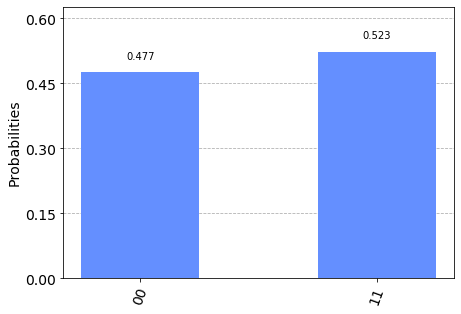

In [5]:
plot_histogram(counts)

### Détails du code

1 - On importe les packages  
2 - On initialise nos variables  
3 - On ajoute nos portes   
4 - On visualise notre circuit  
5 - On simule notre expérimentation   
6 - On visualise nos résultats  

### Phase d'importation 
Les import et from qiskit :   
  1 - Quantum circuit : Contient les opérations quantiques  
  2 - QasmSimulateur : Mesure la performance de la librairie Aer  
  3 - plothistogramme : renvoie l'histrogramme  

### Initialisation de nos variables
  circuit = QuantumCircuit (2,2)  
      Ici, on initialise nos 2 qbits à l'état 0 avec 2 bit à zéros, circuit représente le circuit quantique.

### Ajout des portes  
On ajout nos portes une par une dans le circuit de manière à former l'etat de Bell.  

QuantumCircuit.h(0): A Hadamard gate H on qubit 0, which puts it into a superposition state.

QuantumCircuit.cx(0, 1): A controlled-Not operation (CNOT) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

QuantumCircuit.measure([0,1], [0,1]): if you pass the entire quantum and classical registers to measure, the ith qubit’s measurement result will be stored in the ith classical bit.



### Visualisation du circuit

Avec la méthode .draw, on observe notre entrée initialisée à 0 pour le premier qbit et 1 pour le second.  
  
  

### Simulation de l'expérience 

On observe un résultat de 00 à àpeu près 50% du temps, l'argument shots de la méthode execute permet de spécifier le nombre de fois où l'on veut lancer notre circuit.